# Tutorial on changing parameters of acquisition/histogram

In [1]:
from TCSPC import *
plt.rcParams['figure.constrained_layout.use'] = True

In [2]:
NADH = Simulation([0.75,0.25],[0.4,4]) #create sim instance of simulation class
EGFP = Simulation([0.503,0.497],[3.07,2.43]) #EGFP
mCherry  = Simulation([0.83,0.17],[1.43,2.38]) #mCherry

### Change number of photons directly through `Simulation.n_photon`

Signal to Noise Ratio (SNR) increases as n_photon increases.\
Poisson noise =$\sqrt{N}$ where $N$ is the number of photons at time $t$.\
SNR = $N/\sqrt{N}$ = $\sqrt{N}$

In [3]:
sim_list = [NADH,EGFP,mCherry] #list of Simulation class objects
sim_name = ['NADH','EGFP','mCherry'] #list of names for the Simulations

In [7]:
sim = EGFP 
sim.n_photon = int(8e7)
sim.MC_exp()

array([3.33037725, 3.44434714, 3.17169739, ..., 9.05154615, 3.71229844,
       7.07299663])

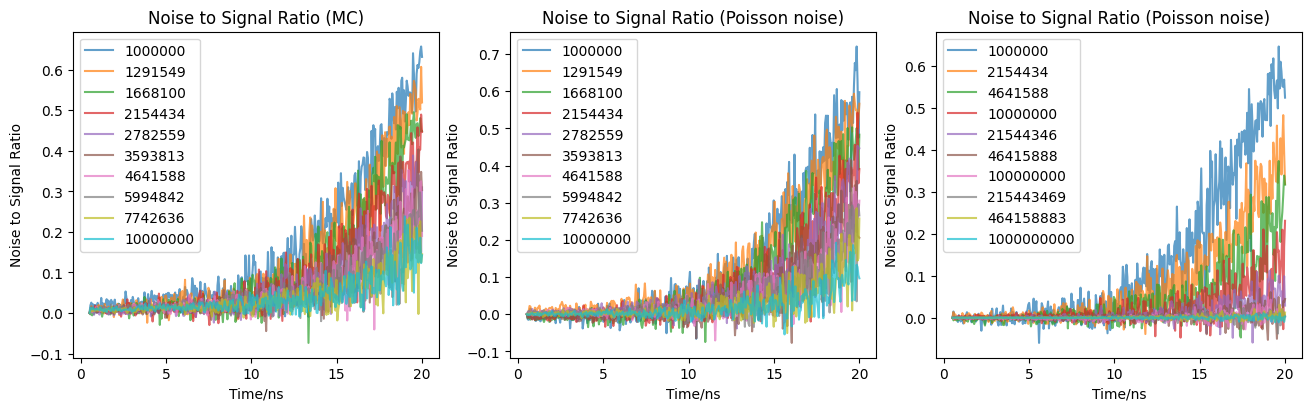

In [18]:
sim = EGFP 
y_list = [[],[],[]] #list to store generated y arrays
fig,ax = plt.subplots(nrows =1, ncols = 3,figsize = (13,4))
for i in range(3):
    if i <2 :
        n_photon_array = np.logspace(6,7,10)
    else: 
        n_photon_array = np.logspace(6,9,10)
    for n_photon in n_photon_array:
        sim.n_photon = int(n_photon)
        #Monte Carlo simulation
        if i == 0:
            sim.MC_exp()
            bins,y = sim.MC_exp_hist()
        else:
            bins,y =sim.multi_exp_data()
        idx = np.argmax(y) #index of maximum, trim from maximum
        y = y[idx:]/np.max(y)
        y_list[i].append(y) #append normalized data (maximum is 1)
        y_pure= exp2(sim.t[:-idx],sim.amp[0],*sim.tau) #pure signal
        ax[i].plot(sim.t[idx:],(y-y_pure)/y,label = f'{int(n_photon)}',alpha = 0.7) #noise to signa ratio (avoid division by 0)
    ax[i].set_title('Noise to Signal Ratio'+[' (MC)', ' (Poisson noise)',' (Poisson noise)'][i])
    ax[i].set_xlabel('Time/ns')
    ax[i].set_ylabel('Noise to Signal Ratio')
    ax[i].legend()

